# Final Project - DATA620 Web Analytics
Daniel Dittenhafer & Justin Hink

## Python References

Here we load the required references including networkX version 1.11.

In [27]:
import csv
import collections
import numpy as np

import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt

import networkx as nx
import networkx_helpers as nxh
nx.__version__

'1.11'

## Load Data Set

Here we load the basic data set of cabinet positions and the related nominee information.

In [2]:
imageDest = "../images/"
graphmlDest = "../data/"
dataFile = "../data/TrumpCabinet.csv"
dataset = []
with open( dataFile, "rb" ) as theFile:
    reader = csv.DictReader( theFile )
    for line in reader:
        dataset.append(line)

In [3]:
# Show an example of the loaded data
dataset[1]

{'Cabinet Seat': 'Secretary of Defense',
 'CampaignPosition': '',
 'Citation': '',
 'OrgType': 'Military',
 'Organization': 'U.S. Central Command',
 'PastTrump': '',
 'Person': 'James Mattis',
 'Prior Position': 'General',
 'Wikipedia': 'https://en.wikipedia.org/wiki/James_Mattis',
 'Wikipedia Org': 'https://en.wikipedia.org/wiki/United_States_Central_Command',
 'twitter': ''}

## Graph Construction

In this section, we convert the raw data into edge sets associated with various graph instances.

In [8]:
def makeGraph(data, src, dest, gx=None):
    """Helper function to construct the graph with node types included."""
    if gx is None:
        gx = nx.Graph()
        
    nodeTypes = {}
    for i in data:
        
        if len(i[src]) > 0 and len(i[dest]) > 0:
            gx.add_edge(i[src],i[dest])
            nodeTypes[i[src]] = src
            nodeTypes[i[dest]] = dest
        else:
            print src, ":", i[src]
            print dest, ":", i[dest]
            
    nx.set_node_attributes (gx, "NodeType", nodeTypes)
    
    return gx

In [ ]:
people = []
for i in dataset:
    people.append(i["Person"])
    

gxOrgType = makeGraph(dataset, "Person", "OrgType")

gxPriorPosition = makeGraph(dataset, "Person", "Prior Position")

gxOrganization = makeGraph(dataset, "Person", "Organization")

gxCombined = makeGraph(dataset, "Person", "Organization")
gxCombined = makeGraph(dataset, "Person", "OrgType", gx=gxCombined)
gxCombined = makeGraph(dataset, "Person", "Prior Position", gx=gxCombined)

#### Organization Type

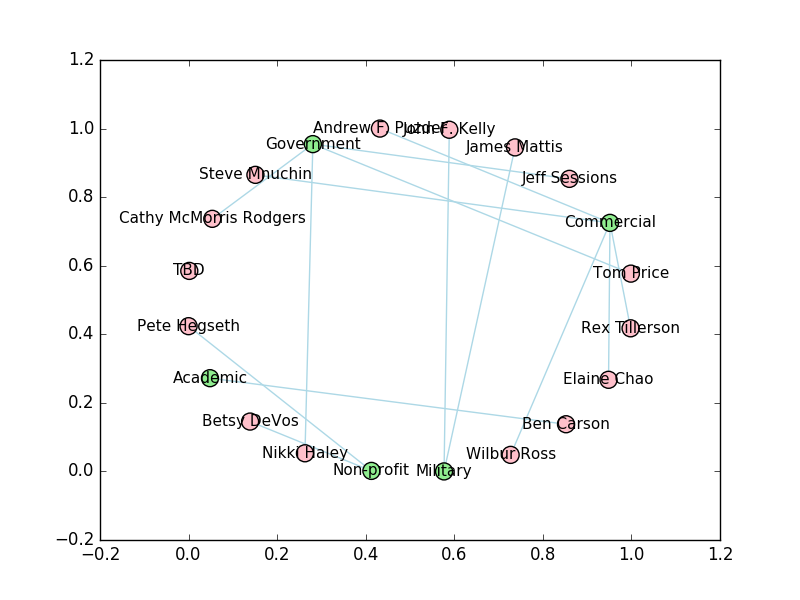

In [56]:
graphFile = imageDest + "DittenhaferHink-DATA620-FinalProj-OrgTypeGraph.png"
nx.write_graphml(gxOrgType, "../data/OrgTypeGraph.graphml")
nxh.renderGraph(gxOrgType, graphFile, False, top=people)

The following graph is a screenshot from Gephi. Blue nodes are organizatoin types, while red nodes are nominees.

![OrgTypeGraph](../images/DittenhaferHink-DATA620-FinalProj-Gephi-OrgTypeGraph.png)

#### Prior Position

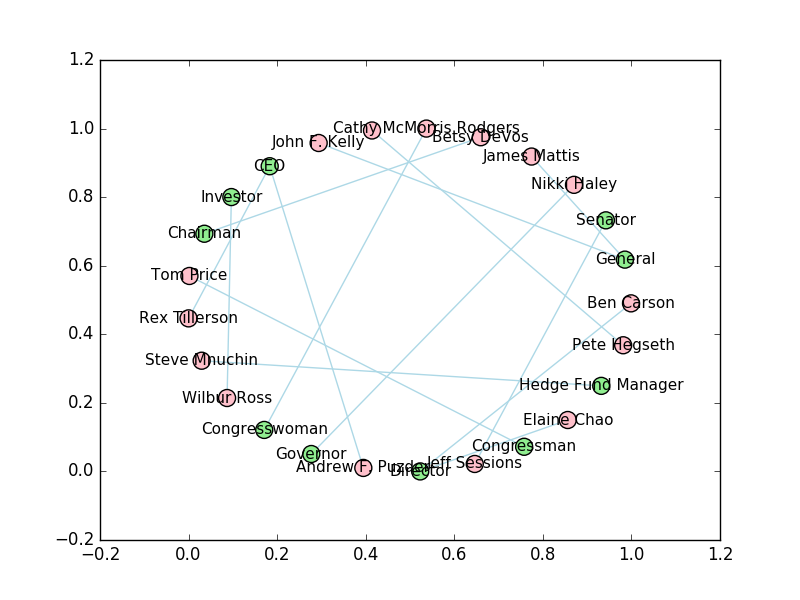

In [15]:
graphFile = imageDest + "DittenhaferHink-DATA620-FinalProj-PriorPositionGraph.png"
nx.write_graphml(gxPriorPosition, "../data/PriorPositionGraph.graphml")
nxh.renderGraph(gxPriorPosition, graphFile, False, top=people)

#### Organization

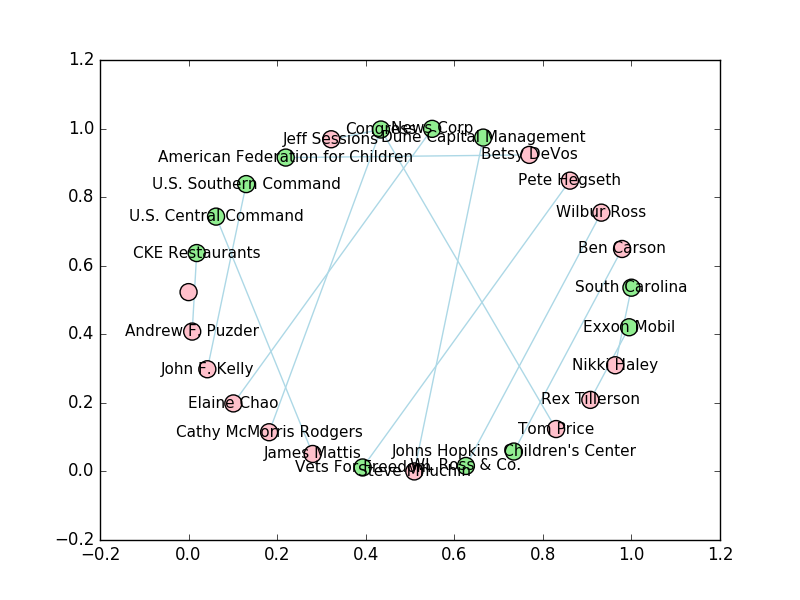

In [17]:
graphFile = imageDest + "DittenhaferHink-DATA620-FinalProj-OrgGraph.png"
nx.write_graphml(gxOrganization, "../data/OrgGraph.graphml")
nxh.renderGraph(gxOrganization, graphFile, False, top=people)

#### Combined Graph

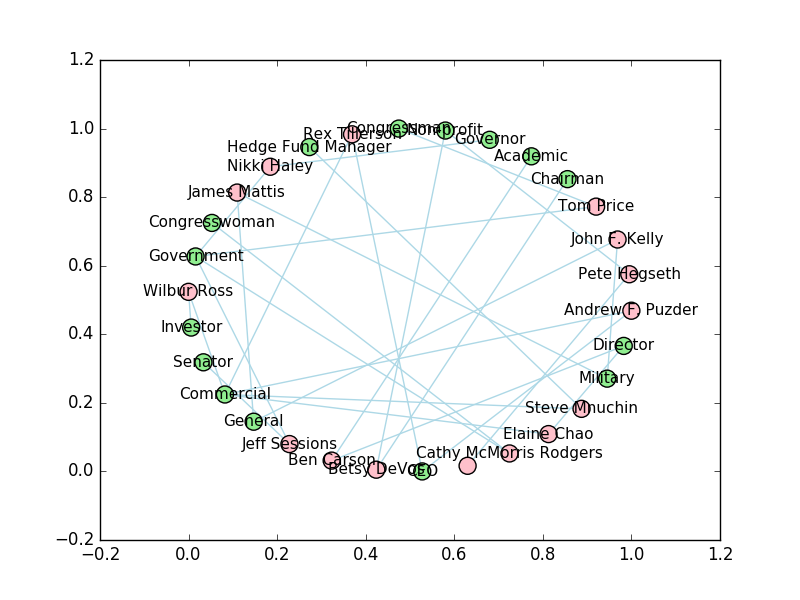

In [16]:
graphFile = imageDest + "DittenhaferHink-DATA620-FinalProj-CombinedGraph.png"
nx.write_graphml(gxCombined, "../data/CombinedGraph.graphml")
nxh.renderGraph(gxCombined, graphFile, False, top=people)

## Sampling of Trump Twitter Followers

The `python-twitter` api was used to acquire a sample of twitter followers. Given Mr. Trumps 17+ million follows, and twitter's rate limited API, it was not feasible to download the entire follower data set. Instead approximately 41,496 followers were downloaded.

In [10]:
dataFile = "../data/trump_followers_plus.csv"
twDataset = []
with open( dataFile, "rb" ) as theFile:
    reader = csv.DictReader( theFile )
    for line in reader:
        twDataset.append(line)

In [18]:
twDataset[0]
print (len(twDataset))

41496


In [32]:
# Extract out the language counts
langDict = collections.defaultdict(int)
for f in twDataset:
    langDict[f["lang"]] += 1
    
print langDict

defaultdict(<type 'int'>, {'el': 33, 'en-IN': 1, 'en': 30799, 'zh': 1, 'zh-Hans': 36, 'vi': 1070, 'ca': 5, 'en-AU': 3, 'it': 218, 'zh-Hant': 6, 'ar': 623, 'cs': 38, 'es-MX': 2, 'id': 186, 'es': 1204, 'en-gb': 435, 'ru': 1176, 'nl': 174, 'pt': 393, 'no': 21, 'zh-tw': 143, 'nb': 2, 'tr': 620, 'lv': 2, 'zh-cn': 612, 'th': 55, 'ro': 30, 'pl': 119, 'ta': 2, 'en-GB': 59, 'fr': 990, 'bg': 14, 'hr': 13, 'bn': 1, 'de': 713, 'da': 50, 'fa': 51, 'hi': 12, 'xx-lc': 2, 'fi': 51, 'hu': 35, 'ja': 639, 'he': 46, 'zh-TW': 75, 'sq': 1, 'ko': 70, 'sv': 132, 'ur': 3, 'sk': 8, 'zh-CN': 477, 'fil': 2, 'uk': 28, 'sr': 15})


In [36]:
fig, ax = plt.subplots()
width = 0.35 
ind = np.arange(len(langDict)) 
rects1 = ax.bar(ind, langDict.values(), width, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Followers with Language')
ax.set_title('Languages of Twitter Followers (41K Sample)')
ax.set_xticks(ind + width)
ax.set_xticklabels(langDict.keys(), rotation=45)

plt.savefig("../images/twitterFollowLang.png")

![](../images/twitterFollowLang.png)

Next, the follower graph by language was created and saved to graphml for use in Gephi.

In [ ]:
gxSomeFollowers = makeGraph(twDataset, "screen_name", "lang")

In [13]:
graphFile = imageDest + "DittenhaferHink-DATA620-FinalProj-SomeTwitterFollowers.png"
nx.write_graphml(gxSomeFollowers, "../data/SomeTwitterFollowers.graphml")

MemoryError: 

# Text Analyis of Cabinet Related Wikipedia Articles

In [2]:
from wordcloud import WordCloud, STOPWORDS
from bs4 import BeautifulSoup
import urllib2

In [3]:
class WikiWordCloudGenerator(object):
    """Class that provided utilities to generate word clouds from Wikipedia URLs"""

    """generate a wordcloud image from a single wikipedia url"""
    def generate_wordcloud_from_url(self, wiki_url, image_output_file_name):
        raw_text = self.generate_text_from_url(wiki_url)
        self.generate_wordcloud_from_text(raw_text, image_output_file_name)

    """generate a wordcloud image from a string"""
    def generate_wordcloud_from_text(self, text_to_process, image_output_file_name):
        # Generate a word cloud image
        stopwords = set(STOPWORDS)
        stopwords.add("retrieved")
        stopwords.add("ext")
        stopwords.add("state")
        stopwords.add("ready")
        stopwords.add("edit")
        stopwords.add("new")
        stopwords.add("user")
        stopwords.add("true")
        wordcloud = WordCloud(stopwords=stopwords).generate(text_to_process)

        # Display the generated image:
        import matplotlib.pyplot as plt
        plt.imshow(wordcloud)
        plt.axis("off")
        if image_output_file_name:
            plt.savefig(image_output_file_name)
        else:
            plt.show()

    """generate a wordcloud image from a multiple wikipedia urls"""
    def generate_wordcloud_from_multiple_urls(self, wiki_urls, image_output_file_name):
        all_raw_text = []
        for url in wiki_urls:
            all_raw_text.append(self.generate_text_from_url(url))

        all_flattened = ''.join(all_raw_text)
        self.generate_wordcloud_from_text(all_flattened, image_output_file_name)

    """grabs text from a single url"""
    def generate_text_from_url(self, wiki_url):
        header = {'User-Agent': 'Mozilla/5.0'} # Needed to prevent 403 error on Wikipedia
        req = urllib2.Request(wiki_url,headers=header)
        page = urllib2.urlopen(req)
        soup = BeautifulSoup(page)
        return soup.text

    def get_combined_scraped_text(self, wiki_urls):
        all_raw_text = []
        for url in wiki_urls:
            all_raw_text.append(self.generate_text_from_url(url))

        all_flattened = ''.join(all_raw_text)
        return all_flattened

# instantiate
wc_generator = WikiWordCloudGenerator()

### Jeff Sessions

In [4]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Jeff_Sessions"], "")

C:\Users\Dan\Anaconda2\envs\gl-env\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


### James Mattis

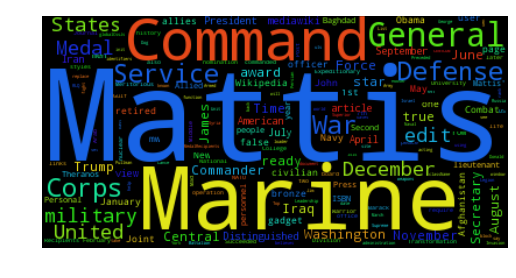

In [9]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/James_Mattis"], "")

### Tom Price

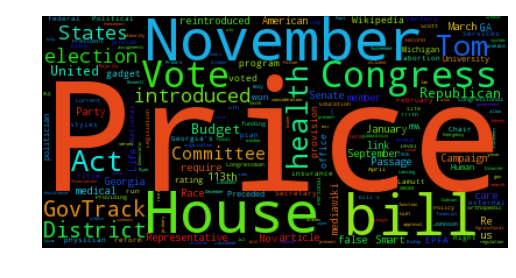

In [32]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Tom_Price_(U.S._politician)"], "")

### Ben Carson

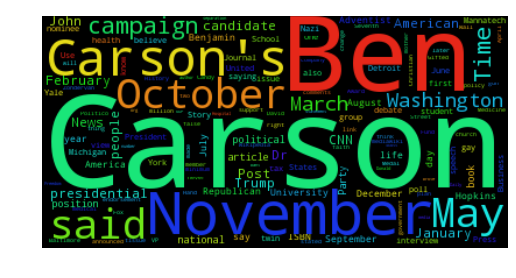

In [33]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Ben_Carson"], "")

### Betsy Devos

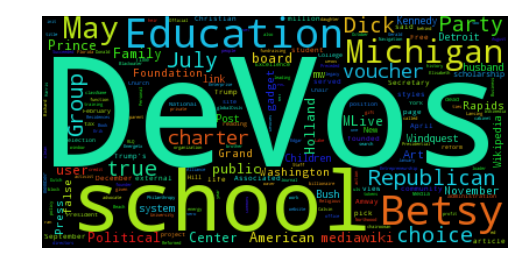

In [24]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Betsy_DeVos"], "")

### Nikki Haley

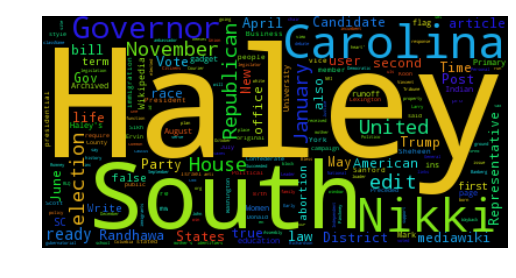

In [13]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Nikki_Haley"], "")

### Elaine Chao

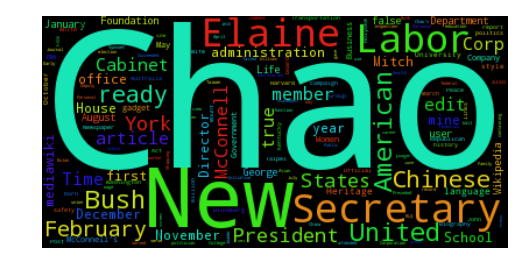

In [14]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Elaine_Chao"], "")

### Steven Mnuchin

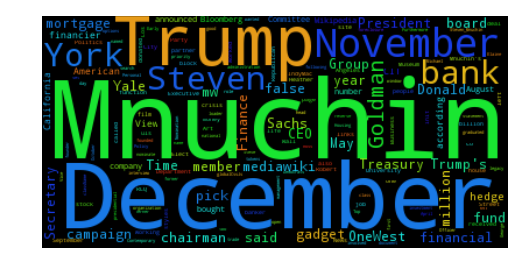

In [34]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Steven_Mnuchin"], "")

### Wilbur Ross

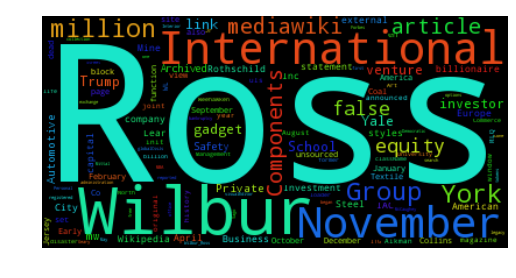

In [35]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Wilbur_Ross"], "")

### Rex Tillerson

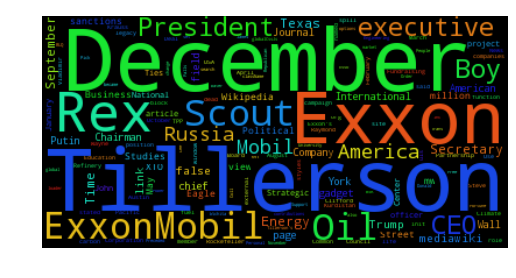

In [36]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Rex_Tillerson"], "")

### Cathy McMorris Rodgers

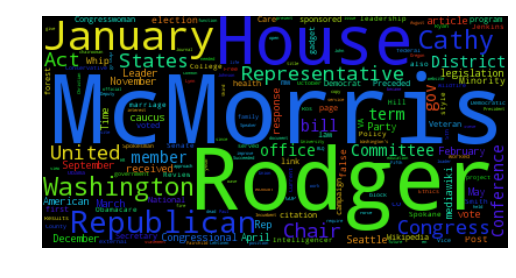

In [37]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Cathy_McMorris_Rodgers"], "")

### Pete Hegseth

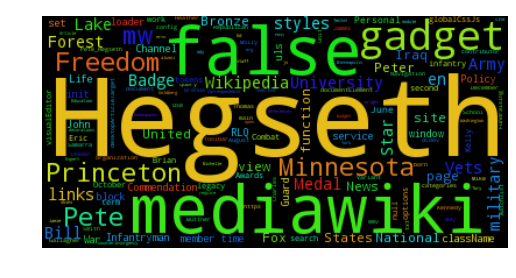

In [38]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Pete_Hegseth"], "")

### Andrew Puzder

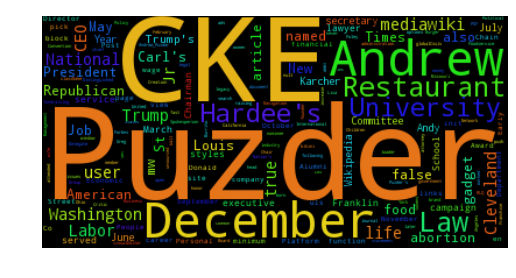

In [28]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Andrew_Puzder"], "")

### All Cabinet Members

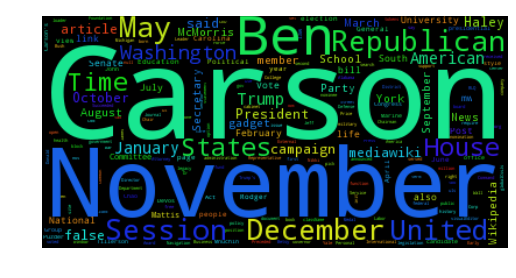

In [6]:
members_urls = ["http://en.wikipedia.org/wiki/Jeff_Sessions",
"http://en.wikipedia.org/wiki/James_Mattis",
"http://en.wikipedia.org/wiki/Tom_Price_(U.S._politician)",
"http://en.wikipedia.org/wiki/Ben_Carson",
"http://en.wikipedia.org/wiki/Betsy_DeVos",
"http://en.wikipedia.org/wiki/Nikki_Haley",
"http://en.wikipedia.org/wiki/Elaine_Chao",
"http://en.wikipedia.org/wiki/Steven_Mnuchin",
"http://en.wikipedia.org/wiki/Wilbur_Ross",
"http://en.wikipedia.org/wiki/Rex_Tillerson",
"http://en.wikipedia.org/wiki/Cathy_McMorris_Rodgers",
"http://en.wikipedia.org/wiki/Pete_Hegseth",
"http://en.wikipedia.org/wiki/Andrew_Puzder"
]

wc_generator.generate_wordcloud_from_multiple_urls(members_urls, "")

### All Cabinet Members' Directly Related Organizations

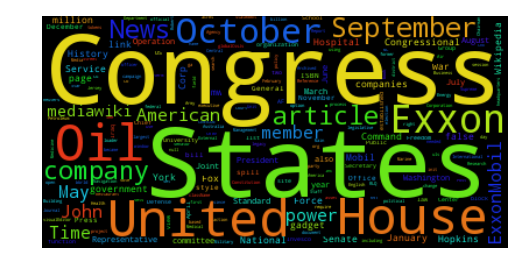

In [7]:
orgs_urls = [
"https://en.wikipedia.org/wiki/United_States_Congress",
"https://en.wikipedia.org/wiki/United_States_Central_Command",
"https://en.wikipedia.org/wiki/Johns_Hopkins_Hospital",
"https://en.wikipedia.org/wiki/Alliance_for_School_Choice",
"https://en.wikipedia.org/wiki/News_Corp",
"https://en.wikipedia.org/wiki/Invesco",
"https://en.wikipedia.org/wiki/ExxonMobil",
"https://en.wikipedia.org/wiki/Vets_For_Freedom",
"https://en.wikipedia.org/wiki/CKE_Restaurants"
]

wc_generator.generate_wordcloud_from_multiple_urls(orgs_urls, "")

### Members + Organizations

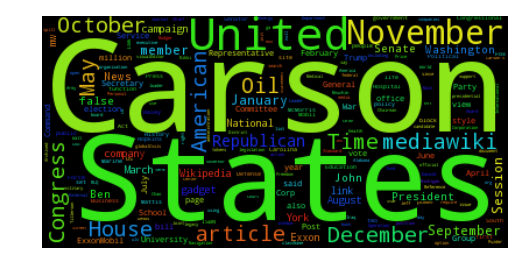

In [41]:
wc_generator.generate_wordcloud_from_multiple_urls(members_urls+orgs_urls, "")

In [8]:
try:
    import nltk
    from nltk.corpus import stopwords
except:
    print 'import nltk error'
import string
import pandas as pd
import pylab
import matplotlib.pyplot as plt

In [11]:
# clean up wiki scraped text
wiki_raw = wc_generator.get_combined_scraped_text(members_urls+orgs_urls)
wiki_raw = ''.join([i for i in wiki_raw if not i.isdigit()])
wiki_raw = ''.join([i if ord(i) < 128 else '' for i in wiki_raw])
wiki_raw = wiki_raw.encode("utf-8").split()
s=set(stopwords.words('english'))
s.add('retrieved')
wiki_raw = filter(lambda w: not w in s, wiki_raw)

wiki_unique = set()
wiki_all_filtered = []
table = string.maketrans("","")
def trans_punc(s):
    return s.translate(table, string.punctuation)
for w in wiki_raw:
    try:
        trans = trans_punc(str(w.lower()))
        # filter out empty strings
        if trans:
            wiki_unique.add(trans)
            wiki_all_filtered.append(trans)
    except Exception:
        pass

In [12]:
print('Total Number of Words: %i' % len(wiki_all_filtered))

print('Number of Unique Words: %i' % len(wiki_unique))

Total Number of Words: 78355
Number of Unique Words: 13119


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


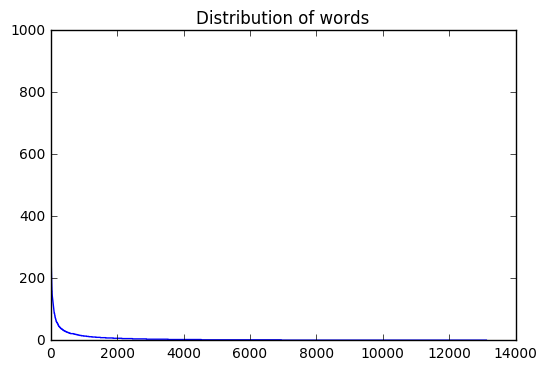

In [13]:
fd = nltk.FreqDist([w.lower() for w in wiki_all_filtered])

# translate results into pandas dataframe
wiki_df = pd.DataFrame(fd.items(), columns=['Word', 'Frequency'])
wiki_df = wiki_df.sort(['Frequency'], ascending=[0])

# plot top 200 words frequency
plt.title("Distribution of words")
plt.plot(list(wiki_df['Frequency']))
plt.show()

In [15]:
wiki_df['CummSum'] = wiki_df['Frequency'].cumsum()
wiki_df['GtHalf'] = wiki_df['CummSum'] > (len(wiki_all_filtered) / 2.0)
wiki_df.index = range(1,len(wiki_df) + 1)

print wiki_df.head(20)

# note there is a bug when running in a jupyter notebook.  The stopwords given to nltk are ignored.  
# This problem does not occur when the same code is run outside a notebook environment
# Words below such as "retrieved", "the" and "b" should be filtered out.

          Word  Frequency  CummSum GtHalf
1    retrieved       1000     1000  False
2          the        935     1935  False
3       carson        514     2449  False
4           in        485     2934  False
5       states        432     3366  False
6       united        425     3791  False
7     november        399     4190  False
8     congress        396     4586  False
9          new        348     4934  False
10          us        321     5255  False
11       house        296     5551  False
12           b        280     5831  False
13         may        279     6110  False
14    december        261     6371  False
15     october        260     6631  False
16         oil        255     6886  False
17         ben        235     7121  False
18        news        233     7354  False
19  washington        233     7587  False
20   september        231     7818  False


In [16]:
# find how many words sum to be half of the total words
half_point = wiki_df['GtHalf'] == True
print wiki_df[half_point].head(1)

         Word  Frequency  CummSum GtHalf
586  preceded         23    39192   True


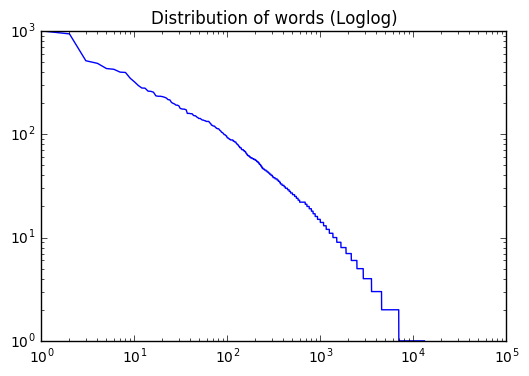

In [17]:
# show zipf trend
plt.title("Distribution of words (Loglog)")
plt.loglog(wiki_df.index,wiki_df['Frequency'])
plt.show()